# Project 9: Movie Theatre Simulation
### Team Insight
#### <font color='#C70039'> Authors: Nouf Aljohani, Amal Almutairi, Salha Nasser, Rawan Alsudias, & Rahaf Alzahrani

In [187]:
import numpy as np
import pandas as pd
import random
generator = np.random.default_rng()
import matplotlib.pyplot as plt

## Variables

In [246]:
screens=5
seats=30
children_tickets=4
adult_tickets=10
senior_tickets=8
week = ["Mon", "Tue", "Wed","Thu", "Fri", "Sat","Sun"]
movies =['Minions 2', 'Top Gun', 'Encanto', 'Paws of Fury', 'Memory']  # List 5 of your favorite movies
week_days = np.zeros(7)     
total_visitors = total_children_visitors  = total_seniors_visitors  =total_adults_visitors = np.zeros(7,dtype = int)
snack_revenue = np.zeros((7,4)) # 7 rows, 4 cols to keep track of all revenue (by snack and day)
buyers_count = np.zeros((7,4)) # to keep track of how many people bought certain snack.
snacks_week = np.zeros(7) #Store totals for each day
s_mat = np.zeros(4) # to keep track of total snacks revenue
snacks = {"Popcorn":5.5, "Nachos":7, "Hotdogs": 6, "Candy":4}
r_mat = np.zeros((7,5))
movies_mat = np.zeros(5) # to keep track of total movies revenue

## Function 1
This function simulates a movie theater by randomizing the number of visitor, to get the revenue of a week.

In [266]:
def theater_simulation():
    # these are the variablese that  we need in and outside  the function
    global  total_visitors, total_children_visitors, total_seniors_visitors, total_adults_visitors, week_days, r_mat, movies_mat
    # these are the variables we need  only in the function
    per_day_total_children_visitors= np.zeros((7,5),dtype=int)
    per_day_total_adults_visitors= np.zeros((7,5),dtype=int)
    per_day_total_seniors_visitors= np.zeros((7,5),dtype=int)
    per_day_total_vistors = np.zeros((7,5),dtype=int)
    
 

    # iterate through the week
    for i in range(len(week_days)):
        # Keep track of total revenue for the day
        total_revenue =0
         # iterate through the amount of screens on a particular day
        for j in range(screens):
            #here we increase the probability of having more people in the weekends 
            if i==5 or i==6:
                visitors_adults = random.randint(12,seats) 
                
                vistors_senior = random.randint(0,seats - visitors_adults) 
                
                visitors_children = random.randint(0,seats - (visitors_adults+vistors_senior))
                
            else:

                visitors_adults= random.randint(0,seats)
                
                vistors_senior=random.randint(0,seats-visitors_adults)
                
                visitors_children =random.randint(0,seats-(visitors_adults+vistors_senior))
                
            # cheack if it is Friday then there should be a 10% discount on senior citizen ticket costs
            if i==4:
                
                revnue_senior=vistors_senior*(senior_tickets-(senior_tickets*0.10))
                
            else:
                # Calculate the revenue for adults ,children, and senior
                revnue_adults = visitors_adults*adult_tickets
                revnue_children = visitors_children*children_tickets
                revnue_senior=vistors_senior*senior_tickets




            # Calculating the total revenue , assigning per day total children ,adult ,senior , and total visitors
            total_revenue =total_revenue+revnue_adults+revnue_children + revnue_senior
            per_day_total_children_visitors[i,j] = visitors_children
            per_day_total_adults_visitors[i,j] = visitors_adults
            per_day_total_seniors_visitors[i,j] = vistors_senior
            per_day_total_vistors[i,j] = visitors_children + visitors_adults + vistors_senior

            r_mat [i,j] = total_revenue
            

        week_days[i]=np.sum(r_mat[i,:])
    
    # Calculating total visitors , total children ,total seniors, and total adults
    total_visitors = per_day_total_vistors.sum(axis=1)
    total_children_visitors  = per_day_total_children_visitors.sum(axis=1)
    total_seniors_visitors = per_day_total_seniors_visitors.sum(axis=1)
    total_adults_visitors = per_day_total_adults_visitors.sum(axis=1)
    movies_mat= np.sum(r_mat, axis=0)


## Function 2
This function simulates a week in the theater with 10% discount for presale tickets.

In [267]:
def discount_ticket():
    
    discount = 0.1
    
    # Keep track of total discount for the day
    global total_discount
    total_discount = list()

    # Total children visitors for each day (with presale tickets)
    global total_visitors_children_a_day_with_presale_tickets
    total_visitors_children_a_day_with_presale_tickets = list()

    # Total seniors visitors for each day (with presale tickets)
    global total_visitors_seniors_a_day_with_presale_tickets
    total_visitors_seniors_a_day_with_presale_tickets = list()

    # Total adults visitors for each day (with presale tickets)
    global total_visitors_adults_a_day_with_presale_tickets
    total_visitors_adults_a_day_with_presale_tickets = list()
     
        
    for i in range(0,len(week_days)):

        # Calculate how many children, seniors and adults are tickets prebuyers
        
        visitors_adults_discount = total_adults_visitors[i] - (np.random.randint(0, total_adults_visitors[i]))
        total_visitors_adults_a_day_with_presale_tickets.append(visitors_adults_discount)
        
        visitors_children_discount = total_children_visitors[i] - (np.random.randint(0, total_children_visitors[i]))
        total_visitors_children_a_day_with_presale_tickets.append(visitors_children_discount)
        
        visitors_seniors_discount = total_seniors_visitors[i] - (np.random.randint(0, total_seniors_visitors[i]))
        total_visitors_seniors_a_day_with_presale_tickets.append(visitors_seniors_discount)

        # Calculate the discount for adults, children and seniors

        adults_discount = (adult_tickets * discount) * visitors_adults_discount
        children_discount = (children_tickets * discount) * visitors_children_discount
        seniors_discount = (senior_tickets * discount) * visitors_seniors_discount

        # Save the total discount to the corresponding day
        total_discount.append(round(adults_discount + children_discount + seniors_discount, 2))


## Function 3
This function simulates the snacks revenue of the movie theater in a week.

In [268]:
def snacks_func():
    global week_days, snack_revenue, snacks_week, s_mat, buyers_count
    
    # Calculate snacks revenue 
    # a loop that goes through all 7 days 
    
    for d in range(len(week_days)): # here start from 0-6 in indexing.
        i=0    # to help in indexing the snack_revenue matrix.
        
        for s in snacks: # here start from 0-3 # a loop that goes through all 4 snacks
            
            # this variable is for storing the snack price multiplied by a random number of people
            # assuming 50% of total_visitors at least buy 
            
            no_of_buyers = generator.integers(total_visitors[d]*0.2, total_visitors[d]*3, size=1)
            
            selected_snacks = snacks[s] * no_of_buyers
            # assign to the matrix
            snack_revenue[d,i] = selected_snacks
            buyers_count [d, i] = no_of_buyers
            i+=1
         # snacks revenue per day   
        snacks_week[d] = np.sum(snack_revenue[d, :])
    # snacks revenue distribution
    s_mat = np.sum(snack_revenue, axis=0)
    

## Function 4
Fixed costs function.

In [269]:
def fixedcost(monthly_rent,monthly_insurance_cost,monthly_employee_costs,mmonthly_manager_costs):
    """ calculate fixed costs monthly: property rent, insurance cost, and employee and manager costs"""
    total_monthly_fixed_cost= monthly_rent+monthly_insurance_cost+monthly_employee_costs+mmonthly_manager_costs
    print(f'total monthly fixed costs is {total_monthly_fixed_cost}')

# Calling Functions 

In [292]:
theater_simulation()

In [293]:
print(total_children_visitors)
print(total_adults_visitors)
print(total_seniors_visitors)
print(total_visitors)
print(week_days)

[16 32 30 12 19 15  9]
[ 76  63  64  77  90 104  77]
[19 35 36 47 18 21 39]
[111 130 130 136 127 140 125]
[2746.  3118.  3406.  3492.  2145.6 3712.  3542. ]


-------------------------------------------------------------------------------------------------------------------------

In [294]:
discount_ticket()

In [295]:
total_revenue = week_days - total_discount
print(f'Total Revenue in a Week: {total_revenue}')
print(f'Total Discount in a Week: {total_discount}')

Total Revenue in a Week: [2681.2 3074.  3365.6 3453.  2135.4 3691.  3467. ]
Total Discount in a Week: [64.8, 44.0, 40.4, 39.0, 10.2, 21.0, 75.0]


-------------------------------------------------------------------------------------------------------------------------

In [296]:
snacks_func()

In [297]:
snacks_week

array([3668. , 5675. , 6823.5, 5810.5, 4219.5, 5790. , 3799.5])

In [298]:
snack_revenue

array([[ 891. , 1351. ,  318. , 1108. ],
       [1793. , 1484. , 1890. ,  508. ],
       [1039.5, 2254. , 2058. , 1472. ],
       [1567.5, 1939. , 1920. ,  384. ],
       [ 533.5, 1484. , 1374. ,  828. ],
       [ 924. , 1512. , 2082. , 1272. ],
       [ 478.5, 1575. , 1566. ,  180. ]])

In [299]:
buyers_count

array([[162., 193.,  53., 277.],
       [326., 212., 315., 127.],
       [189., 322., 343., 368.],
       [285., 277., 320.,  96.],
       [ 97., 212., 229., 207.],
       [168., 216., 347., 318.],
       [ 87., 225., 261.,  45.]])

In [300]:
#calculate total monthly fixed costs
fixedcost(
    monthly_rent=300000,
    monthly_insurance_cost=150000,
    monthly_employee_costs=90000,
   mmonthly_manager_costs=20000
)

total monthly fixed costs is 560000


# Graphs

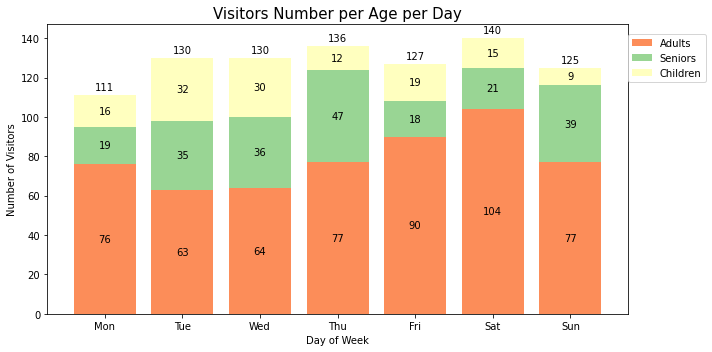

In [301]:
# visitors numbers per age per day
fig, ax = plt.subplots(figsize = (10, 5))

adult= ax.bar(week, total_adults_visitors, label='Adults', color='#FC8D59' )
senior= ax.bar(week, total_seniors_visitors, label='Seniors', bottom=total_adults_visitors, color='#99D594')
child= ax.bar(week, total_children_visitors, label='Children', bottom=total_adults_visitors+total_seniors_visitors, color='#FFFFBF')
ax.set_xlabel('Day of Week')
ax.set_ylabel('Number of Visitors')
ax.set_title('Visitors Number per Age per Day', size=15)
ax.legend(loc=(1,0.8))

ax.bar_label(child, fmt="%g", padding=3)
# check this
ax.bar_label(adult, label_type='center')
ax.bar_label(child, label_type='center')
ax.bar_label(senior, label_type='center')

plt.tight_layout()
plt.savefig('visitors_numbers_per_age.jpg')
plt.show()


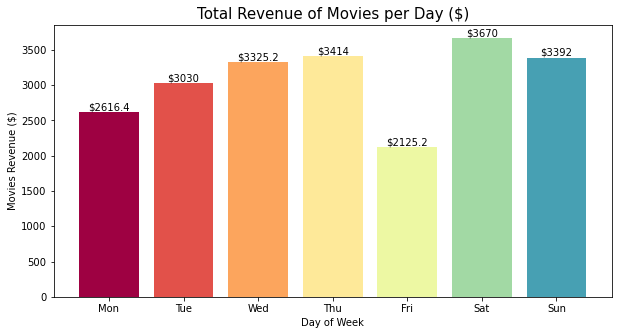

In [302]:
# Total Revenue with Discount 

fig, ax= plt.subplots(figsize = (10, 5))
 
# creating the bar plot
#fig, ax = plt.subplots()
bars = ax.bar(week, total_revenue-total_discount, color=plt.cm.Spectral(np.linspace(0,7)))
ax.bar_label(bars, fmt="$%g")
plt.xlabel("Day of Week")
plt.ylabel("Movies Revenue ($)")
plt.title("Total Revenue of Movies per Day ($)", size=15)
plt.savefig('total_revenue_of_movies.jpg')
plt.show()

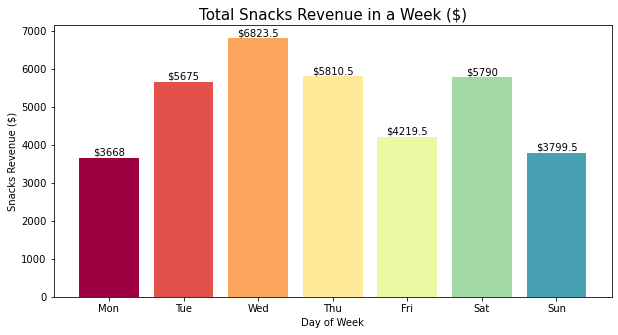

In [307]:
# Graph for snacks 

fig, ax= plt.subplots(figsize = (10, 5))
 
# creating the bar plot
#fig, ax = plt.subplots()
bars = ax.bar(week, snacks_week, color=plt.cm.Spectral(np.linspace(0,7)))
ax.bar_label(bars, fmt="$%g")
plt.xlabel("Day of Week")
plt.ylabel("Snacks Revenue ($)")
plt.title("Total Snacks Revenue in a Week ($)", size=15)
plt.savefig('total_snacks_revenue.jpg')
plt.show()


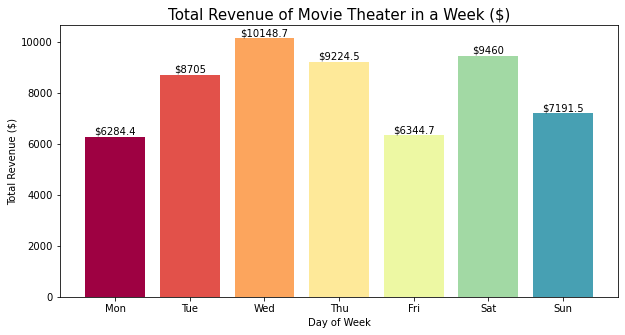

In [304]:
# Total Revenue of Movie Theater

fig, ax= plt.subplots(figsize = (10, 5))
 
# creating the bar plot
#fig, ax = plt.subplots()
bars = ax.bar(week, total_revenue-total_discount+snacks_week, color=plt.cm.Spectral(np.linspace(0,7)))
ax.bar_label(bars, fmt="$%g")
plt.xlabel("Day of Week")
plt.ylabel("Total Revenue ($)")
plt.title("Total Revenue of Movie Theater in a Week ($)", size=15)
plt.savefig('total_revenue_of_theater_in_a_week.jpg')
plt.show()

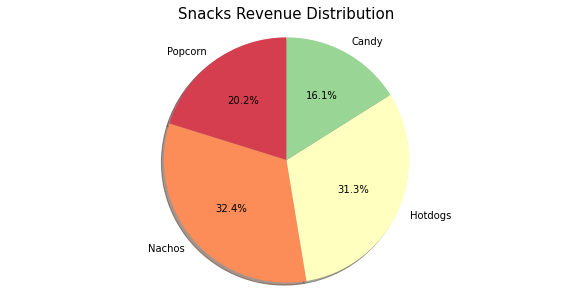

In [305]:
# snacks distribution
labels = snacks.keys()
sizes = [15, 30, 45, 10]
fig1, ax1 = plt.subplots(figsize = (10, 5))
ax1.pie(s_mat, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90, colors=["#D53E4F", "#FC8D59" ,"#FFFFBF","#99D594"])
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Snacks Revenue Distribution", size=15)
plt.savefig('snacks_revenue_dist.jpg')
plt.show()

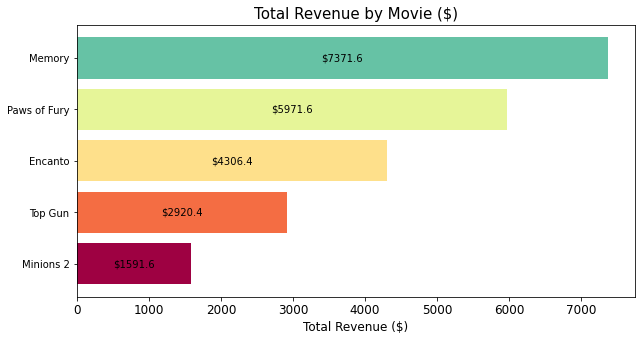

In [306]:
# movies distribution
fig2, ax2 = plt.subplots(figsize = (10, 5))
bars2= plt.barh(movies, movies_mat,color=plt.cm.Spectral(np.linspace(0,1, 6)))

ax2.bar_label(bars2, fmt="$%g", label_type='center')
plt.xlabel("Total Revenue ($)", size=12)
plt.title("Total Revenue by Movie ($)", size=15)
ax2.tick_params(axis='x', labelsize=12)
plt.savefig('Total_revenu_by_movie.jpg')
plt.show()